<h1 style="color:#27391C; font-weight:bold; font-style:italic; font-family:Courier; font-size:30px;  ">Exploratory Data Analysis (EDA) on Movie Dataset</h1>

In [2]:
import os
import numpy as np
import pandas as pd

from numerize import numerize as nz

import sqlite3
from lets_plot import * 
LetsPlot.setup_html()

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_FOLDER = os.path.join('../data/clean')

<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Connecting to the SQLite Database</h5>

In [4]:
conn = sqlite3.connect(os.path.join(DATA_FOLDER, './Movies.db'))

<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Merging Movie Data from Multiple Tables Using SQL Joins</h5>

In [5]:

genres_dict = pd.read_sql_query("SELECT genre_id, genre FROM geners", conn).set_index("genre_id")["genre"].to_dict()
writers_dict = pd.read_sql_query("SELECT writer_id, writer_name FROM screen_writers", conn).set_index("writer_id")["writer_name"].to_dict()
directors_dict = pd.read_sql_query("SELECT director_id, director_name FROM directors", conn).set_index("director_id")["director_name"].to_dict()
languages_dict = pd.read_sql_query("SELECT language_id, languages FROM languages", conn).set_index("language_id")["languages"].to_dict()
countries_dict = pd.read_sql_query("SELECT country_id, country FROM pro_country", conn).set_index("country_id")["country"].to_dict()
companies_dict = pd.read_sql_query("SELECT company_id, company_name FROM pro_company", conn).set_index("company_id")["company_name"].to_dict()
ratings_df = pd.read_sql_query("SELECT title_id, user_rating, imdb_rating, Metascore, rt_score FROM ratings", conn)


chunk_size = 5000  
offset = 0
processed_data = []

while True:
    query = f"SELECT * FROM movies_master LIMIT {chunk_size} OFFSET {offset}"
    chunk = pd.read_sql_query(query, conn)

    if chunk.empty:
        break  

    
    chunk["genre"] = chunk["genre_id"].map(genres_dict)
    chunk["screen_writer"] = chunk["writer_id"].map(writers_dict)
    chunk["director"] = chunk["director_id"].map(directors_dict)
    chunk["languages"] = chunk["language_id"].map(languages_dict)
    chunk["country"] = chunk["country_id"].map(countries_dict)
    chunk["company_name"] = chunk["company_id"].map(companies_dict)

    chunk = chunk.merge(ratings_df, on="title_id", how="left")

    processed_data.append(chunk)  
    offset += chunk_size  

conn.close()


if processed_data:
    movies_df = pd.concat(processed_data, ignore_index=True)
    print(" Data processing successful! Sample output:")
    print(movies_df.head())  
else:
    print("No data found in 'movies_master'.")


 Data processing successful! Sample output:
   title_id        Title release_date  run_time  writer_id  genre_id  \
0         0        Flow    1996-01-01  1h 20min          0         1   
1         0        Flow    1996-01-01  1h 20min          0         2   
2         0        Flow    1996-01-01  1h 20min          0         3   
3         0        Flow    1996-01-01  1h 20min          0         4   
4         1  Demon City    2025-02-26  1h 46min          0         5   

   company_id  language_id  country_id  director_id   genre screen_writer  \
0           0            1           0            0   Drama           NaN   
1           0            1           0            0  Comedy           NaN   
2           0            1           0            0  Horror           NaN   
3           0            1           0            0   Crime           NaN   
4           1            2           1            1  Action           NaN   

       director languages country company_name  user_rating 

In [6]:
movies_df

,title_id,Title,release_date,run_time,writer_id,genre_id,company_id,language_id,country_id,director_id,genre,screen_writer,director,languages,country,company_name,user_rating,imdb_rating,Metascore,rt_score
0,0,Flow,1996-01-01,1h 20min,0,1,0,1,0,0,Drama,NaN,NaN,English,NaN,NaN,8.0,4.9,0.0,0.0
1,0,Flow,1996-01-01,1h 20min,0,2,0,1,0,0,Comedy,NaN,NaN,English,NaN,NaN,8.0,4.9,0.0,0.0
2,0,Flow,1996-01-01,1h 20min,0,3,0,1,0,0,Horror,NaN,NaN,English,NaN,NaN,8.0,4.9,0.0,0.0
3,0,Flow,1996-01-01,1h 20min,0,4,0,1,0,0,Crime,NaN,NaN,English,NaN,NaN,8.0,4.9,0.0,0.0
4,1,Demon City,2025-02-26,1h 46min,0,5,1,2,1,1,Action,NaN,Seiji Tanaka,Japanese,Japan,Netflix,6.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,999,TiMER,2009-05-14,1h 39min,0,6,462,1,2,651,Fantasy,NaN,Jac Schaeffer,English,United States of America,Present Pictures,6.3,6.5,69.0,0.0
6438,999,TiMER,2009-05-14,1h 39min,0,1,462,1,2,651,Drama,NaN,Jac Schaeffer,English,United States of America,Present Pictures,6.3,6.5,69.0,0.0
6439,999,TiMER,2009-05-14,1h 39min,0,2,462,1,2,651,Comedy,NaN,Jac Schaeffer,English,United States of America,Present Pictures,6.3,6.5,69.0,0.0
6440,999,TiMER,2009-05-14,1h 39min,0,8,462,1,2,651,Science Fiction,NaN,Jac Schaeffer,English,United States of America,Present Pictures,6.3,6.5,69.0,0.0


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Changing the data type using astype()</h5>

In [7]:
movies_df["Metascore"] = movies_df["Metascore"].astype(float).astype(int)
movies_df["rt_score"] = movies_df["rt_score"].astype(float).astype(int)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_id       6442 non-null   int64  
 1   Title          6442 non-null   object 
 2   release_date   6442 non-null   object 
 3   run_time       6442 non-null   object 
 4   writer_id      6442 non-null   int64  
 5   genre_id       6442 non-null   int64  
 6   company_id     6442 non-null   int64  
 7   language_id    6442 non-null   int64  
 8   country_id     6442 non-null   int64  
 9   director_id    6442 non-null   int64  
 10  genre          6440 non-null   object 
 11  screen_writer  5119 non-null   object 
 12  director       5667 non-null   object 
 13  languages      6442 non-null   object 
 14  country        3705 non-null   object 
 15  company_name   6405 non-null   object 
 16  user_rating    6442 non-null   float64
 17  imdb_rating    6442 non-null   float64
 18  Metascor

In [8]:
movies_df.columns

Index(['title_id', 'Title', 'release_date', 'run_time', 'writer_id',
       'genre_id', 'company_id', 'language_id', 'country_id', 'director_id',
       'genre', 'screen_writer', 'director', 'languages', 'country',
       'company_name', 'user_rating', 'imdb_rating', 'Metascore', 'rt_score'],
      dtype='object')

In [9]:
movies_df.dtypes

title_id           int64
Title             object
release_date      object
run_time          object
writer_id          int64
genre_id           int64
company_id         int64
language_id        int64
country_id         int64
director_id        int64
genre             object
screen_writer     object
director          object
languages         object
country           object
company_name      object
user_rating      float64
imdb_rating      float64
Metascore          int64
rt_score           int64
dtype: object

In [10]:
movies_df.shape

(6442, 20)

<h5 style="color:#A64D79;font-style:italic; font-weight:bold;"></h5>

In [11]:
movies_df.describe()

,title_id,writer_id,genre_id,company_id,language_id,country_id,director_id,user_rating,imdb_rating,Metascore,rt_score
count,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000
mean,465.967246,304.196523,7.284539,130.192021,2.233313,1.396771,231.749767,6.684803,6.297485,46.317914,38.939925
std,288.979360,281.806707,3.471923,131.951693,3.793463,2.079534,193.571456,1.137427,1.509917,30.523195,36.463289
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204.000000,35.000000,5.000000,12.000000,1.000000,0.000000,61.000000,6.300000,5.800000,25.000000,0.000000
50%,461.000000,232.000000,6.000000,79.000000,1.000000,2.000000,184.000000,6.900000,6.600000,51.000000,36.000000
75%,706.000000,537.000000,10.000000,206.000000,1.000000,2.000000,390.000000,7.300000,7.200000,70.000000,73.000000
max,999.000000,895.000000,19.000000,462.000000,29.000000,19.000000,651.000000,8.800000,9.300000,100.000000,100.000000


In [12]:
movies_df.describe(include='all')

,title_id,Title,release_date,run_time,writer_id,genre_id,company_id,language_id,country_id,director_id,genre,screen_writer,director,languages,country,company_name,user_rating,imdb_rating,Metascore,rt_score
count,6442.000000,6442,6442,6442,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6440,5119,5667,6442,3705,6405,6442.000000,6442.000000,6442.000000,6442.000000
unique,NaN,930,875,132,NaN,NaN,NaN,NaN,NaN,NaN,19,895,651,29,19,462,NaN,NaN,NaN,NaN
top,NaN,Snow White and the Seven Dwarfs,1938-01-14,1h 35min,NaN,NaN,NaN,NaN,NaN,NaN,Fantasy,Ron Clements,Ron Clements,English,United States of America,Walt Disney Pictures,NaN,NaN,NaN,NaN
freq,NaN,144,144,249,NaN,NaN,NaN,NaN,NaN,NaN,1691,40,77,4976,2965,687,NaN,NaN,NaN,NaN
mean,465.967246,NaN,NaN,NaN,304.196523,7.284539,130.192021,2.233313,1.396771,231.749767,NaN,NaN,NaN,NaN,NaN,NaN,6.684803,6.297485,46.317914,38.939925
std,288.979360,NaN,NaN,NaN,281.806707,3.471923,131.951693,3.793463,2.079534,193.571456,NaN,NaN,NaN,NaN,NaN,NaN,1.137427,1.509917,30.523195,36.463289
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,204.000000,NaN,NaN,NaN,35.000000,5.000000,12.000000,1.000000,0.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.300000,5.800000,25.000000,0.000000
50%,461.000000,NaN,NaN,NaN,232.000000,6.000000,79.000000,1.000000,2.000000,184.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,6.600000,51.000000,36.000000
75%,706.000000,NaN,NaN,NaN,537.000000,10.000000,206.000000,1.000000,2.000000,390.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.300000,7.200000,70.000000,73.000000


In [13]:
movies_df['title_id'].describe()

count    6442.000000
mean      465.967246
std       288.979360
min         0.000000
25%       204.000000
50%       461.000000
75%       706.000000
max       999.000000
Name: title_id, dtype: float64

In [14]:
movies_df['Title'].describe()

count                                 6442
unique                                 930
top       Snow White and the Seven Dwarfs 
freq                                   144
Name: Title, dtype: object

In [15]:
movies_df['genre_id'].describe()

count    6442.000000
mean        7.284539
std         3.471923
min         0.000000
25%         5.000000
50%         6.000000
75%        10.000000
max        19.000000
Name: genre_id, dtype: float64

In [16]:
movies_df['genre'].describe()

count        6440
unique         19
top       Fantasy
freq         1691
Name: genre, dtype: object

In [17]:
movies_df['director_id'].describe()

count    6442.000000
mean      231.749767
std       193.571456
min         0.000000
25%        61.000000
50%       184.000000
75%       390.000000
max       651.000000
Name: director_id, dtype: float64

In [18]:
movies_df['director'].describe()

count             5667
unique             651
top       Ron Clements
freq                77
Name: director, dtype: object

In [19]:
movies_df['writer_id'].describe()

count    6442.000000
mean      304.196523
std       281.806707
min         0.000000
25%        35.000000
50%       232.000000
75%       537.000000
max       895.000000
Name: writer_id, dtype: float64

In [20]:
movies_df['screen_writer'].describe()

count             5119
unique             895
top       Ron Clements
freq                40
Name: screen_writer, dtype: object

In [21]:
movies_df['language_id'].describe()

count    6442.000000
mean        2.233313
std         3.793463
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        29.000000
Name: language_id, dtype: float64

In [22]:
movies_df['languages'].describe()

count        6442
unique         29
top       English
freq         4976
Name: languages, dtype: object

In [23]:
movies_df['company_id'].describe()

count    6442.000000
mean      130.192021
std       131.951693
min         0.000000
25%        12.000000
50%        79.000000
75%       206.000000
max       462.000000
Name: company_id, dtype: float64

In [24]:
movies_df['company_name'].describe()

count                     6405
unique                     462
top       Walt Disney Pictures
freq                       687
Name: company_name, dtype: object

In [25]:
movies_df['country_id'].describe()

count    6442.000000
mean        1.396771
std         2.079534
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max        19.000000
Name: country_id, dtype: float64

In [26]:
movies_df['country'].describe()

count                         3705
unique                          19
top       United States of America
freq                          2965
Name: country, dtype: object

In [27]:
movies_df['user_rating'].describe()

count    6442.000000
mean        6.684803
std         1.137427
min         0.000000
25%         6.300000
50%         6.900000
75%         7.300000
max         8.800000
Name: user_rating, dtype: float64

In [28]:
movies_df['release_date'].describe()

count           6442
unique           875
top       1938-01-14
freq             144
Name: release_date, dtype: object

In [29]:
movies_df['run_time'].describe()

count         6442
unique         132
top       1h 35min
freq           249
Name: run_time, dtype: object

In [30]:
movies_df['imdb_rating'].describe()

count    6442.000000
mean        6.297485
std         1.509917
min         0.000000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_rating, dtype: float64

In [31]:
movies_df['Metascore'].describe()

count    6442.000000
mean       46.317914
std        30.523195
min         0.000000
25%        25.000000
50%        51.000000
75%        70.000000
max       100.000000
Name: Metascore, dtype: float64

In [32]:
movies_df['rt_score'].describe()

count    6442.000000
mean       38.939925
std        36.463289
min         0.000000
25%         0.000000
50%        36.000000
75%        73.000000
max       100.000000
Name: rt_score, dtype: float64

<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Top 100 User-Rated Movies by Production Company</h5>

<Figure size 2000x600 with 0 Axes>

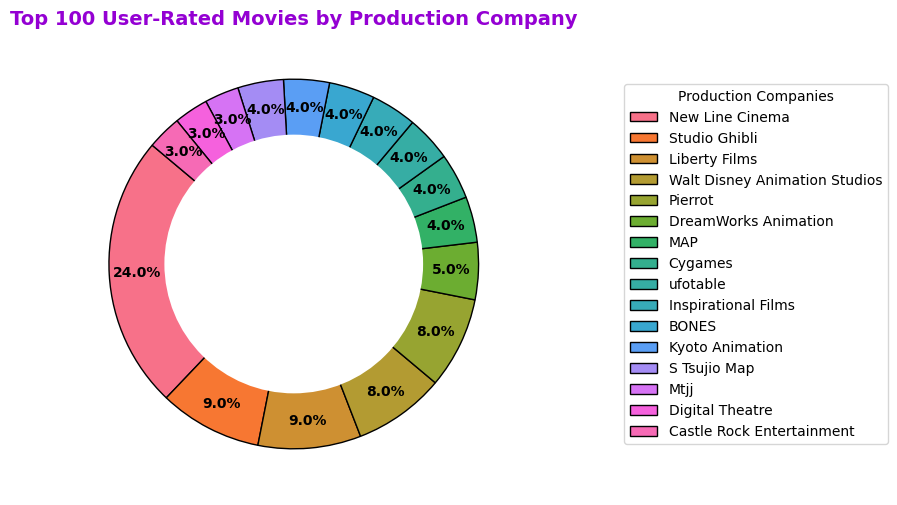

In [ ]:

top_100_movies = movies_df.nlargest(100, 'user_rating')[['Title', 'user_rating', 'company_name']]

company_top_rated = top_100_movies['company_name'].value_counts()

colors = sns.color_palette("husl", n_colors=len(company_top_rated))

plt.figure(figsize=(20, 6))
fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    company_top_rated, labels=None, autopct='%1.1f%%', 
    startangle=140, wedgeprops={'edgecolor': 'black'}, 
    pctdistance=0.85, colors=colors
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_patch(centre_circle)

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight("bold")

ax.legend(wedges, company_top_rated.index, title="Production Companies", 
          loc="center left", bbox_to_anchor=(1.2, 0.5), fontsize=10, frameon=True)

plt.title("Top 100 User-Rated Movies by Production Company", fontsize=14, fontweight='bold',color='#9400D3')

plt.show()


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Converting run_time datatype</h5>

In [34]:

movies_df['run_time'] = movies_df['run_time'].astype(str)
movies_df['run_time'] = movies_df['run_time'].str.extract(r'(\d+)').astype(float)
print(movies_df[['run_time']].head())


   run_time
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0


In [ ]:
print(movies_df[['run_time']].info()``

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   run_time  6442 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB
None


In [36]:
movies_df['run_time'] = movies_df['run_time'].fillna(movies_df['run_time'].median())


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Movie Duration vs. IMDb Rating</h5>

In [37]:

(ggplot(movies_df, aes(x='run_time', y='imdb_rating')) + 
    geom_point(aes(color='imdb_rating'), alpha=0.8, size=3.5) +  
    geom_smooth(method='loess', color='darkblue', size=2, linetype='dashed') +  
    scale_color_gradient(low='blue', high='red') +  
    
    
    ggtitle("Movie Duration vs. IMDb Rating") +  
    theme(plot_title=element_text(size=22, face="bold", color="black", hjust=0.5, vjust=-0.5)) +  

    xlab("Movie Runtime ") + 
    ylab("IMDb Rating") + 

    theme_minimal() +  
    
    theme(axis_text_x=element_text(size=14, face="bold"), 
          axis_text_y=element_text(size=14, face="bold"),
          axis_title_x=element_text(size=16, face="bold"), 
          axis_title_y=element_text(size=16, face="bold"),
          legend_position="right",  
          legend_title=element_text(size=14, face="bold"),
          legend_text=element_text(size=12)) +  

    ggsize(800, 500)  
)


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Movie Count by Genre Across Top 10 Countries</h5>

In [38]:

movies_df_exploded = movies_df.explode('genre')  

top_countries = movies_df_exploded['country'].value_counts().nlargest(10).index
movies_filtered = movies_df_exploded[movies_df_exploded['country'].isin(top_countries)].copy()

plot = (
    ggplot(movies_filtered, aes(x='genre', fill='country')) +  
    geom_bar(stat='count', position='stack') +  
    scale_fill_brewer(type='qual', palette="Paired") +  
    ggtitle("Movie Count by Genre Across Top 10 Countries") +  
    theme_minimal() +  
    theme(
        plot_title=element_text(size=22, face="bold", hjust=0.5, color="darkblue"),  
        axis_text_x=element_text(size=14, face="bold", angle=45),  
        axis_text_y=element_text(size=14, face="bold"),  
        axis_title_x=element_text(size=16, face="bold"),  
        axis_title_y=element_text(size=16, face="bold"),  
        legend_title=element_text(size=14, face="bold"),  
        legend_text=element_text(size=12),  
        legend_position="right"  
    ) + 
    ggsize(1200, 500)  
)


display(plot)

<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Top Production Companies by Movie Count</h5>

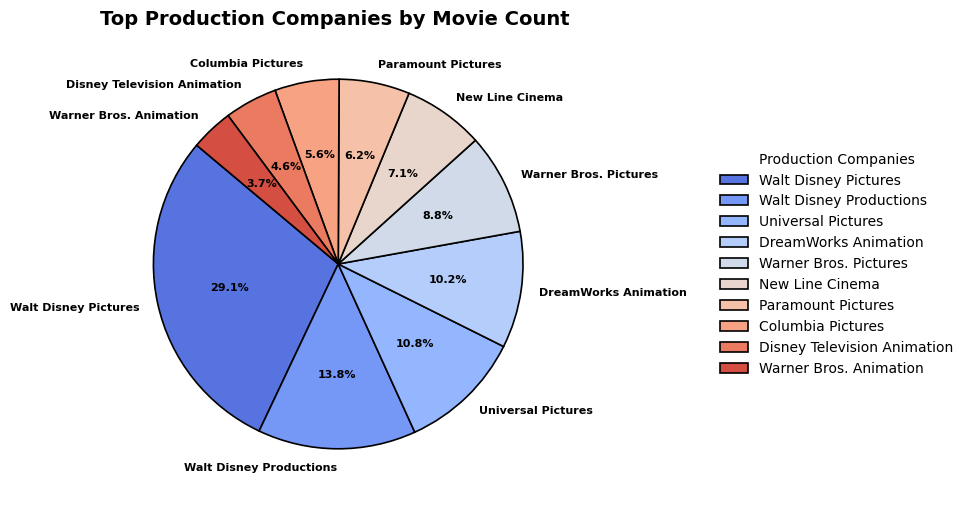

In [39]:
plt.figure(figsize=(20, 6))  

company_counts = movies_df['company_name'].value_counts().head(10)

colors = sns.color_palette("coolwarm", len(company_counts))

wedges, texts, autotexts = plt.pie(
    company_counts.values, labels=company_counts.index, autopct='%1.1f%%',
    colors=colors, startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
    textprops={'fontsize': 8, 'weight': 'bold'}
)

plt.legend(
    wedges, company_counts.index,
    title="Production Companies",
    loc="center left",
    bbox_to_anchor=(1.3, 0.5),  # Moves legend further right
    frameon=False  # Makes legend background transparent
)

plt.title("Top Production Companies by Movie Count ", fontsize=14, fontweight='bold')

plt.subplots_adjust(right=0.8)  

plt.show()


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Visualizing the Top 10 Movie Genres by Count</h5>

In [40]:
genre_counts = movies_df['genre'].value_counts().head(10).reset_index()
genre_counts.columns = ['genre', 'Count']

In [41]:
genre_counts['genre'] = genre_counts['genre'].astype(str)

p = (
    ggplot(genre_counts, aes(x='genre', y='Count', fill='Count')) +
    geom_bar(stat='identity', width=0.7, alpha=0.9, show_legend=True) +  
    geom_text(aes(label='Count'), format_string='{:.0f}', size=8, color='black', vjust=-0.3) +  
    scale_fill_gradient(low='#87CEFA', high='#FF4500') +  # Gradient from blue to red
    ggtitle("Top 10 Movie Genres by Count") +
    xlab("Genre") + 
    ylab("Movie Count") +
    theme_minimal() +
    theme(
        axis_text_x=element_text(size=14, color="black"),
        axis_text_y=element_text(size=14, color="black"),
        plot_title=element_text(size=20, face="bold",color='black'),
        panel_grid_major_x=element_line(color="gray", linetype="dashed")
    )+
    ggsize(1000,500)
)

p


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Identifying Top 10 Most Prolific Directors</h6>

In [42]:
director_counts = movies_df['director'].value_counts().reset_index()
director_counts.columns = ['director', 'Count']
director_counts = director_counts.head(10)


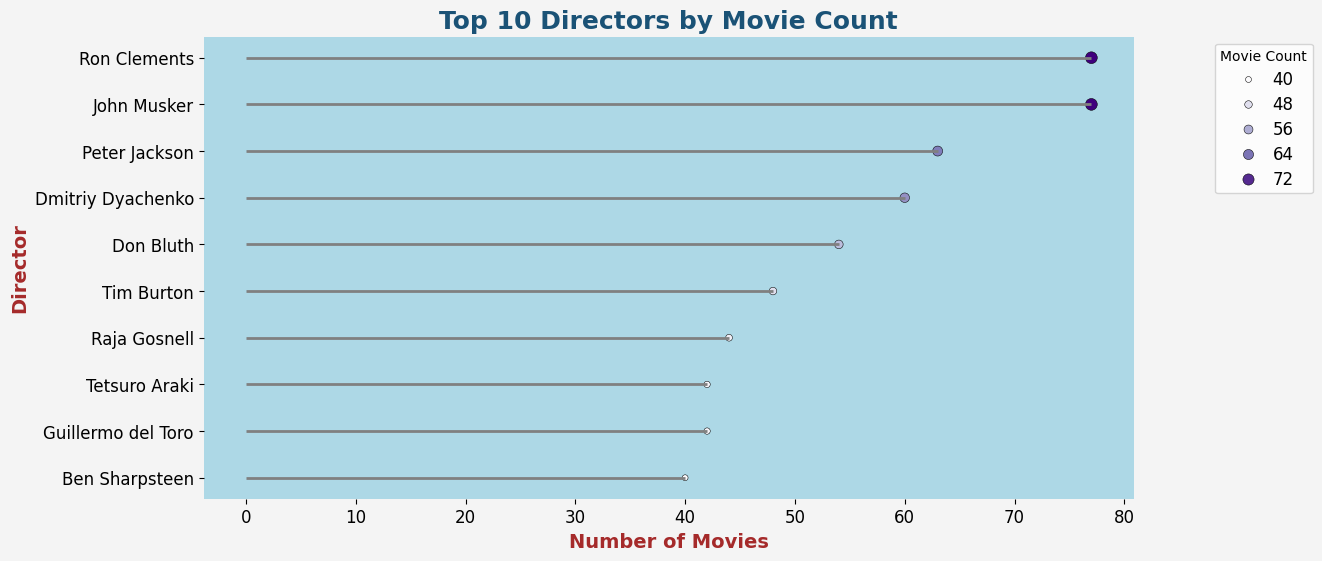

In [43]:

plt.figure(figsize=(12, 6), facecolor='#f4f4f4')

ax = plt.gca()
ax.set_facecolor('lightblue')

plt.hlines(y=director_counts['director'], xmin=0, xmax=director_counts['Count'], color='gray', linewidth=2)

scatter = sns.scatterplot(x=director_counts['Count'], y=director_counts['director'], 
                          size=director_counts['Count'], hue=director_counts['Count'], 
                          palette='Purples', legend=True, edgecolor='black')

plt.title("Top 10 Directors by Movie Count", fontsize=18, fontweight='bold', color='#1A5276')
plt.xlabel("Number of Movies", fontsize=14, color='brown',fontweight='bold')
plt.ylabel("Director", fontsize=14, color='brown',fontweight='bold')

legend = scatter.legend_
legend.set_bbox_to_anchor((1.2, 1))
legend.set_title("Movie Count")  
for text in legend.get_texts():
    text.set_color("black")  
    text.set_fontsize(12)    

plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)

sns.despine(left=True, bottom=True)

plt.show()


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">IMDb Rating Distribution by Genre</h5>

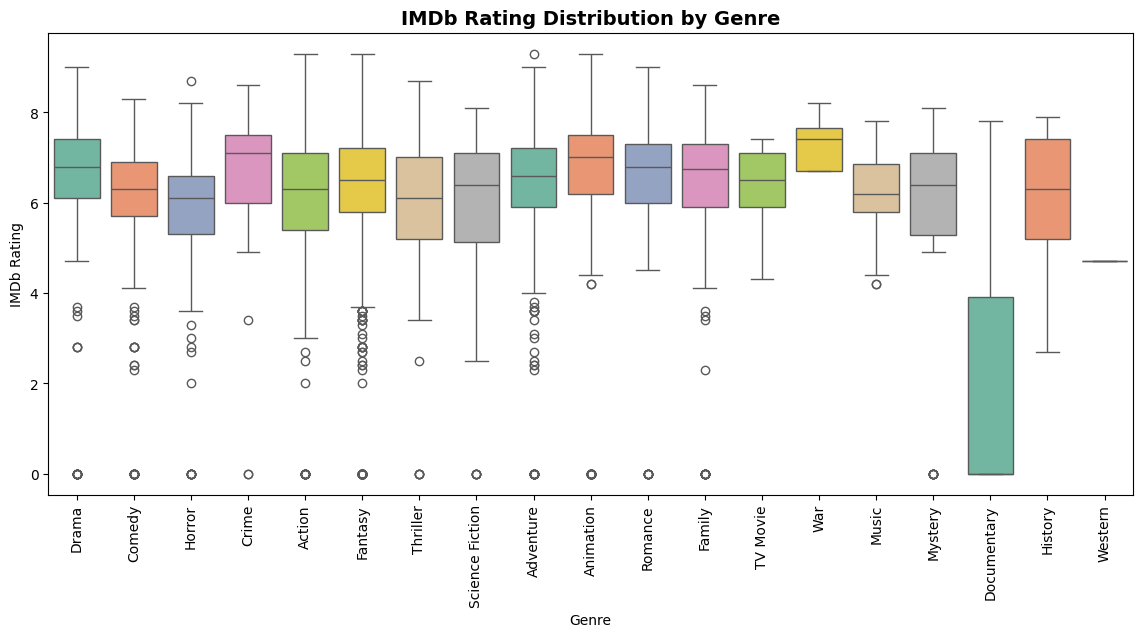

In [44]:

movies_df_exploded = movies_df.explode('genre')

plt.figure(figsize=(14, 6))


sns.boxplot(data=movies_df_exploded, x='genre', y='imdb_rating', hue='genre', palette='Set2', legend=False)

plt.xticks(rotation=90)
plt.title("IMDb Rating Distribution by Genre", fontsize=14, fontweight='bold')
plt.xlabel("Genre")
plt.ylabel("IMDb Rating")
plt.grid(True, linestyle='', alpha=0.6)
plt.show()


In [45]:
print(movies_df['country'].unique())


[nan 'Japan' 'United States of America' 'France' 'China' 'India'
 'United Kingdom' 'Thailand' 'Indonesia' 'South Korea' 'Poland' 'Germany'
 'Hong Kong' 'Spain' 'Ukraine' 'Norway' 'Mexico' 'Sweden' 'Italy' 'Peru']


In [ ]:
<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Visualizing Movie Releases Over Time</h5>
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['Year'] = movies_df['release_date'].dt.year

yearly_counts = movies_df['Year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['Year', 'Count']


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Top 10 Countries by Movie Count Over the Years</h5>

In [48]:
import pandas as pd
import plotly.express as px

movies_df_cleaned = movies_df.dropna(subset=["country", "Year"]).copy()

movies_df_cleaned.loc[:, "Year"] = movies_df_cleaned["Year"].astype(int)

all_years = range(int(movies_df_cleaned["Year"].min()), int(movies_df_cleaned["Year"].max()) + 1)
all_countries = movies_df_cleaned["country"].unique()

full_country_years = pd.MultiIndex.from_product([all_countries, all_years], names=["country", "Year"]).to_frame(index=False)

country_yearly_counts = (
    movies_df_cleaned.groupby(["country", "Year"])
    .size()
    .reset_index(name="Count")
)

country_yearly_counts = full_country_years.merge(country_yearly_counts, on=["country", "Year"], how="left").fillna(0)

adjustment_factor = 1.5
country_yearly_counts.loc[:, "Adjusted Count"] = (country_yearly_counts["Count"] * adjustment_factor) + 1

top_countries = country_yearly_counts.groupby("country")["Count"].sum().reset_index()
top_countries = top_countries.nlargest(10, "Count")

top_country_yearly_counts = country_yearly_counts[country_yearly_counts["country"].isin(top_countries["country"])]

top_country_yearly_counts.loc[:, "country"] = top_country_yearly_counts["country"].astype("category")

import plotly.io as pio
pio.templates.default = "plotly_white"

from IPython.display import display, HTML
display(HTML("<style>.output_scroll { height:1000px;  overflow-y:scroll; }</style>"))

fig = px.scatter(
    top_country_yearly_counts,
    x="Year",
    y="Adjusted Count",
    size="Adjusted Count",
    color="country",
    animation_frame="Year",
    animation_group="country",
    hover_name="country",
    size_max=60,
    title="Top 10 Countries by Movie Count Over the Years",
    labels={"country": "Country", "Adjusted Count": "Number of Movies", "Year": "Release Year"},
    range_x=[int(movies_df_cleaned["Year"].min()), int(movies_df_cleaned["Year"].max())], 
    range_y=[1, top_country_yearly_counts["Adjusted Count"].max() + 5],
    category_orders={"country": top_country_yearly_counts["country"].unique().tolist()}
)

fig.show()

print(top_countries)


                     country   Count
18  United States of America  2965.0
7                      Japan   400.0
0                      China    70.0
1                     France    54.0
17            United Kingdom    53.0
12               South Korea    30.0
8                     Mexico    27.0
13                     Spain    20.0
3                  Hong Kong    19.0
2                    Germany    17.0


<h5 style="color:#A64D79;font-style:italic; font-weight:bold;">Visualizing Movie Releases Over Time</h5>

In [ ]:
(ggplot(yearly_counts, aes(x='Year', y='Count')) + 
     geom_line(color='pink', size=2) +  
     geom_point(size=4, color='Black', fill='#1B4F72', shape=17, stroke=2) +  
     ggtitle("Number of Movies Released Per Year") +
     xlab("Year") + 
     ylab("Number of Movies") +
     theme_minimal() +
     ggsize(1100, 400) +
     scale_color_discrete() +  
     scale_x_continuous(limits=(yearly_counts['Year'].min(), 2025))  
)
